# Capstone Module 3

## Context :
Travel insurance is a type of insurance that provides protection as long as we travel both domestically and abroad. Several countries have even required travelers to have travel insurance, for example, countries in Europe and America. The amount of premium depends on the coverage desired, the length of the trip, and the purpose of the trip. A company engaged in travel insurance wants to know the policyholder who will submit an insurance claim for coverage. Policyholder data at insurance companies is historical data consisting of destinations, insurance products, and so on.

## Features :

| No. | Fitur | Deskripsi |
|-|-|-|
| 1. | **Agency** | Nama Agensi. |
| 2. | **Agency Type** | Type of Travel Insurance Agencies. |
| 3. | **Distibution Channel** | Channel of travel insurance agencies.. |
| 4. | **Product Name** | Name of the travel insurance products.. |
| 5. | **Gender** | Gender of insured. |
| 6. | **Duration** | Duration of Travel. |
| 7. | **Destination** | Destination of Travel. |
| 8. | **Net Sales** | Amount of sales of travel insurance policies. |
| 9. | **Commission (in value)** | Commission received for travel insurance agency. |
| 10. | **Age** | Age of Insured. |
| 11. | **Claim** | Claim Status. |

# **Library Needed**

In [1]:
! pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.0 MB/s eta 0:00:00


In [2]:
# Data manipulation
import pandas as pd
import numpy as np
from collections import defaultdict

# statistics
from scipy.stats import normaltest

# Data Preprocessing
from sklearn.preprocessing import OneHotEncoder, RobustScaler, MinMaxScaler, StandardScaler, PolynomialFeatures, KBinsDiscretizer
from sklearn.feature_selection import SelectKBest
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from category_encoders import BinaryEncoder

# Balancing
from imblearn.over_sampling import SMOTE, RandomOverSampler, SMOTEN, ADASYN, SMOTENC
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour
from imblearn.combine import SMOTEENN, SMOTETomek

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Ensemble
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from lightgbm.sklearn import LGBMClassifier

# Model selection
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_validate, StratifiedKFold, cross_val_score

# Pipeline
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imb_pipeline

# Metric
from sklearn.metrics import classification_report, make_scorer, f1_score, recall_score, precision_score, roc_auc_score, fbeta_score
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix
from imblearn.metrics import classification_report_imbalanced

# Visualisai
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## 1. Data Exploration

In [3]:
df = pd.read_csv('data_travel_insurance.csv')
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


### 1.1 Data Cleaning

In [4]:
# Data information
df.describe(include='all')

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
count,44328,44328,44328,44328,12681,44328.000000,44328,44328.000000,44328.000000,44328.000000,44328
unique,16,2,2,26,2,NaN,138,NaN,NaN,NaN,2
top,EPX,Travel Agency,Online,Cancellation Plan,M,NaN,SINGAPORE,NaN,NaN,NaN,No
freq,24656,32113,43572,12979,6504,NaN,9267,NaN,NaN,NaN,43651
mean,NaN,NaN,NaN,NaN,NaN,49.424292,NaN,40.550948,9.707692,39.925600,NaN
std,NaN,NaN,NaN,NaN,NaN,109.153961,NaN,48.661970,19.625637,13.954926,NaN
min,NaN,NaN,NaN,NaN,NaN,-1.000000,NaN,-357.500000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,18.000000,0.000000,35.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,22.000000,NaN,26.500000,0.000000,36.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,53.000000,NaN,48.000000,11.550000,43.000000,NaN


In [5]:
df.rename(columns={'Commision (in value)' : 'Commision'}, inplace=True)
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision,Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


In [6]:
# Melihat ID Unik tiap kolom
# sample unique value dari setiap kolom
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',None)

def unique_data(airbnb):
    data_unique = pd.DataFrame()
    data_unique['Columns'] = airbnb.columns
    data_unique['Unique Count'] = [airbnb[col].nunique() for col in (airbnb.columns)]
    data_unique['Unique'] = [airbnb[col].unique() for col in (airbnb.columns)]
    return data_unique


unique_data(df)

,Columns,Unique Count,Unique
0,Agency,16,"[C2B, EPX, JZI, CWT, LWC, ART, CSR, SSI, RAB, KML, TST, TTW, JWT, ADM, CCR, CBH]"
1,Agency Type,2,"[Airlines, Travel Agency]"
2,Distribution Channel,2,"[Online, Offline]"
3,Product Name,26,"[Annual Silver Plan, Cancellation Plan, Basic Plan, 2 way Comprehensive Plan, Bronze Plan, 1 way Comprehensive Plan, Rental Vehicle Excess Insurance, Single Trip Travel Protect Gold, Silver Plan, Value Plan, 24 Protect, Annual Travel Protect Gold, Comprehensive Plan, Ticket Protector, Travel Cruise Protect, Single Trip Travel Protect Silver, Individual Comprehensive Plan, Gold Plan, Annual Gold Plan, Child Comprehensive Plan, Premier Plan, Annual Travel Protect Silver, Single Trip Travel Protect Platinum, Annual Travel Protect Platinum, Spouse or Parents Comprehensive Plan, Travel Cruise Protect Family]"
4,Gender,2,"[F, nan, M]"
5,Duration,437,"[365, 4, 19, 20, 8, 2, 25, 90, 24, 43, 103, 376, 6, 16, 27, 34, 3, 14, 12, 31, 5, 7, 56, 29, 30, 58, 9, 38, 42, 11, 13, 40, 79, 370, 366, 26, 83, 55, 18, 100, 1, 35, 36, 75, 23, 73, 32, 232, 37, 10, 4736, 15, 17, 99, 173, 74, 82, 66, 156, 39, 95, 98, 111, 430, 53, 77, 87, 70, 151, 45, 54, 114, 118, 62, 28, 112, 326, 22, 59, 44, 21, 97, 63, 60, 51, 180, 160, 368, 65, 93, 71, 57, 0, 76, 69, 110, 146, 116, 129, 84, ...]"
6,Destination,138,"[SINGAPORE, MALAYSIA, INDIA, UNITED STATES, KOREA, REPUBLIC OF, THAILAND, GERMANY, JAPAN, INDONESIA, VIET NAM, AUSTRALIA, FINLAND, UNITED KINGDOM, SRI LANKA, SPAIN, HONG KONG, MACAO, CHINA, UNITED ARAB EMIRATES, IRAN, ISLAMIC REPUBLIC OF, TAIWAN, PROVINCE OF CHINA, POLAND, CANADA, OMAN, PHILIPPINES, GREECE, BELGIUM, TURKEY, BRUNEI DARUSSALAM, DENMARK, SWITZERLAND, NETHERLANDS, SWEDEN, MYANMAR, KENYA, CZECH REPUBLIC, FRANCE, RUSSIAN FEDERATION, PAKISTAN, ARGENTINA, TANZANIA, UNITED REPUBLIC OF, SERBIA, ITALY, CROATIA, NEW ZEALAND, PERU, MONGOLIA, CAMBODIA, QATAR, NORWAY, LUXEMBOURG, MALTA, LAO PEOPLE'S DEMOCRATIC REPUBLIC, ISRAEL, SAUDI ARABIA, AUSTRIA, PORTUGAL, NEPAL, UKRAINE, ESTONIA, ICELAND, BRAZIL, MEXICO, CAYMAN ISLANDS, PANAMA, BANGLADESH, TURKMENISTAN, BAHRAIN, KAZAKHSTAN, TUNISIA, IRELAND, ETHIOPIA, NORTHERN MARIANA ISLANDS, MALDIVES, SOUTH AFRICA, VENEZUELA, COSTA RICA, JORDAN, MALI, CYPRUS, MAURITIUS, LEBANON, KUWAIT, AZERBAIJAN, HUNGARY, BHUTAN, BELARUS, MOROCCO, ECUADOR, UZBEKISTAN, CHILE, FIJI, PAPUA NEW GUINEA, ANGOLA, FRENCH POLYNESIA, NIGERIA, MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF, NAMIBIA, GEORGIA, COLOMBIA, ...]"
7,Net Sales,1006,"[216.0, 10.0, 22.0, 112.0, 16.0, 50.0, 78.0, 80.0, 40.0, 26.0, 252.85, 47.0, 25.0, 23.0, 20.0, 30.0, 42.0, 56.0, 19.8, 14.0, 29.7, 36.0, 31.0, 58.0, 9.9, 15.0, 21.0, 29.0, 32.0, 125.0, 48.0, 0.0, 21.04, 33.0, 204.6, 34.0, 30.55, 35.0, 49.5, 18.0, 98.0, 77.0, 69.3, 64.0, 0.32, 227.7, 48.5, -216.75, 24.0, 161.0, 99.0, 59.4, 45.0, 37.0, 44.0, 19.0, 75.0, 39.0, 17.55, -59.4, 51.0, -29.7, 80.25, 63.0, 12.0, 72.0, 53.0, 38.0, 17.0, 54.0, 69.0, 115.0, 76.3, 19.5, 29.5, 62.0, 11.0, 3.73, 79.0, 138.6, 22.5, 59.0, 5.59, 33.5, 53.25, 62.25, 93.0, -12.0, 1.03, 27.0, 56.5, 39.6, 28.0, 41.0, 97.0, 128.0, 43.0, 66.0, 26.5, 0.19, ...]"
8,Commision,915,"[54.0, 0.0, 7.7, 4.0, 9.1, 63.21, 10.5, 11.88, 17.82, 23.4, 7.5, 5.94, 43.75, 23.76, 7.36, 132.99, 9.57, 7.64, 12.25, 29.7, 6.3, 5.63, 41.58, 5.25, 0.09, 6.0, 136.62, 31.53, 54.19, 11.55, 10.15, 40.25, 59.4, 35.64, 15.75, 12.95, 28.5, 9.75, 4.39, 20.06, 18.0, 4.25, 19.07, 4.88, 7.38, 15.5, 1.05, 83.16, 14.7, 15.4, 1.57, 8.38, 13.31, 15.56, 0.29, 8.0, 36.73, 13.65, 20.3, 5.0, 10.0, 6.63, 0.05, 24.15, 29.05, 8.88, 14.0, 3.38, 15.88, 0.45, 10.89, 47.52, 0.37, 27.25, 18.13, 15.6, 70.2, 12.4, 72.94, 8.63, 4.63, 6.75, 11.25, 0.96, 53.46, 77.22, 1.13, 4.94, 1.73, 10.38, 58.45, 23.5, 6.94, 6.13, 41.42, 17.5, 13.16, 0.14, 3.23, 15.93, ...]"
9,Age,89,"[57, 33, 26, 59, 28, 36, 22, 39, 27, 48, 43, 51, 65, 47, 35, 54, 23, 46, 58, 42, 31, 29, 37, 68, 8, 32, 61, 49, 56, 25, 50, 34, 38, 44, 118, 45, 53, 20, 30, 41, 69, 52, 40, 70, 76, 74, 66, 63, 55, 21, 60, 7

In [7]:
# Menganalisa data yang memiliki nilai nol
missing_result = {
    'count':df.isnull().sum(),
    'count (%)': round( (df.isnull().sum() / len(df)) * 100, 3 )
}

print("Jumlah nilai kosong pada setiap kolom")
df_missing = pd.DataFrame(missing_result)
df_missing[df_missing['count'] > 0].sort_values('count', ascending=False)

Jumlah nilai kosong pada setiap kolom


,count,count (%)
Gender,31647,71.393


disini kita melihat bahwa missing values banyak terdapat pada gender, kita tidak tahu apakah gender akan mempengaruhi dalam pemberian travel insurance atau tidak maka asusmi yang dapat diambil maka gender tidak berpengaruh terhadap penentuan sehingga kolom gender dapat dihapus

pada kolom destinasi kita melihat bahwa ada beberapa data destinasi yang memiliki koma dan deskripsi setelah koma tersebut tidak berhubungan dengan negara tersebut karenanya kita akan menghapus deskripsi kolom yang tidak dibutuhkan tersebut dan memisahkannya dari kolom destinasi

### 1.2 Mengelompokkan data

### 1.2.1 Mengelompokkan data destinasi menjadi benua

In [8]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision,Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


In [9]:
df.groupby(by=['Destination']).size().sort_values(ascending=False).reset_index(name='counts').head(5)

,Destination,counts
0,SINGAPORE,9267
1,MALAYSIA,4139
2,THAILAND,4122
3,CHINA,3396
4,AUSTRALIA,2578


ambil kata pertama dan menghapus kata setelahnya

In [10]:
df[['Destination', 'City']] = df['Destination'].str.split(',', expand=True)
df.drop(columns='City',axis=1,inplace=True)
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision,Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


In [11]:
df.groupby(by=['Destination']).size().sort_values(ascending=False).reset_index(name='counts').head()

,Destination,counts
0,SINGAPORE,9267
1,MALAYSIA,4139
2,THAILAND,4122
3,CHINA,3396
4,AUSTRALIA,2578


In [12]:
# Mengelompokkan destinasi menjadi benua
# Mapping area
area = {
    'SINGAPORE': 'ASIA', 'THAILAND' : 'ASIA', 'MALAYSIA': 'ASIA', 'CHINA' : 'ASIA', 'INDONESIA' : 'ASIA', 'HONG KONG': 'ASIA',
    'PHILIPPINES': 'ASIA', 'JAPAN': 'ASIA', 'VIET NAM': 'ASIA', 'KOREA': 'ASIA', 'INDIA': 'ASIA', 'TAIWAN': 'ASIA', 'MYANMAR': 'ASIA', 'BRUNEI DARUSSALAM': 'ASIA',
    'CAMBODIA': 'ASIA', 'UNITED ARAB EMIRATES': 'ASIA', 'SRI LANKA': 'ASIA', "LAO PEOPLE'S DEMOCRATIC REPUBLIC": 'ASIA', 'TIBET' : 'ASIA', 'ARMENIA' : 'ASIA',
    'MACAO': 'ASIA', 'NEPAL': 'ASIA', 'BANGLADESH': 'ASIA', 'SAUDI ARABIA': 'ASIA', 'ISRAEL': 'ASIA', 'MONGOLIA': 'ASIA', 'PAKISTAN': 'ASIA',
    'MALDIVES': 'ASIA', 'OMAN': 'ASIA', 'KAZAKHSTAN': 'ASIA', 'JORDAN': 'ASIA', 'QATAR': 'ASIA', 'PAPUA NEW GUINEA': 'ASIA', 'EGYPT': 'ASIA',
    'BAHRAIN': 'ASIA', 'FIJI': 'ASIA', 'ROMANIA': 'ASIA', 'MAURITIUS': 'ASIA', 'UKRAINE': 'ASIA', 'CHILE': 'ASIA', 'GEORGIA': 'ASIA', 'MALTA': 'ASIA',
    'UZBEKISTAN': 'ASIA', 'BULGARIA': 'ASIA', 'ESTONIA': 'ASIA', 'TUNISIA': 'ASIA', 'ECUADOR': 'ASIA', 'SERBIA': 'ASIA', 'BOLIVIA': 'ASIA', 'SLOVENIA': 'ASIA',
    'LUXEMBOURG': 'ASIA', 'COSTA RICA': 'ASIA', 'BHUTAN': 'ASIA', 'VENEZUELA': 'ASIA', 'AZERBAIJAN': 'ASIA', 'LEBANON': 'ASIA', 'VANUATU': 'ASIA', 'ZIMBABWE': 'ASIA',
    'BELARUS': 'ASIA', 'BERMUDA': 'ASIA', 'ETHIOPIA': 'ASIA', 'GHANA': 'ASIA', 'MACEDONIA': 'ASIA', 'GUAM': 'ASIA', 'PANAMA': 'ASIA', 'KYRGYZSTAN': 'ASIA',
    'ZAMBIA': 'ASIA','UZBEKISTAN': 'ASIA', 'BULGARIA': 'ASIA','ESTONIA': 'ASIA','TUNISIA': 'ASIA', 'ECUADOR': 'ASIA', 'SERBIA': 'ASIA', 'BOLIVIA': 'ASIA',
    'SLOVENIA': 'ASIA', 'LUXEMBOURG': 'ASIA', 'COSTA RICA': 'ASIA', 'BHUTAN': 'ASIA','VENEZUELA': 'ASIA', 'AZERBAIJAN': 'ASIA', 'LEBANON': 'ASIA', 'VANUATU': 'ASIA',
    'ZIMBABWE': 'ASIA', 'BELARUS': 'ASIA', 'BERMUDA': 'ASIA', 'ETHIOPIA': 'ASIA', 'GHANA': 'ASIA', 'MACEDONIA': 'ASIA', 'GUAM': 'ASIA', 'PANAMA': 'ASIA', 'KYRGYZSTAN': 'ASIA',
    'ZAMBIA': 'ASIA', 'UGANDA': 'ASIA', 'TRINIDAD AND TOBAGO': 'ASIA', 'NORTHERN MARIANA ISLANDS': 'ASIA', 'KUWAIT': 'ASIA', 'GUINEA': 'ASIA', 'LITHUANIA': 'ASIA',
    'PUERTO RICO': 'ASIA', 'LATVIA': 'ASIA', 'TURKMENISTAN': 'ASIA', 'NIGERIA': 'ASIA', 'NAMIBIA': 'ASIA', 'BENIN': 'ASIA','BOTSWANA': 'ASIA', 'URUGUAY': 'ASIA', 'CAMEROON': 'ASIA',
    'CAYMAN ISLANDS': 'ASIA', 'DOMINICAN REPUBLIC': 'ASIA', 'MOLDOVA': 'ASIA', 'REPUBLIC OF MONTENEGRO': 'ASIA', 'FAROE ISLANDS': 'ASIA', 'SENEGAL': 'ASIA',
    'FRENCH POLYNESIA': 'ASIA', 'REUNION': 'ASIA', 'MALI': 'ASIA', 'GUADELOUPE': 'ASIA', 'TAJIKISTAN': 'ASIA', 'RWANDA': 'ASIA', 'SAMOA': 'ASIA', 'GUINEA-BISSAU': 'ASIA',
    'GUYANA': 'ASIA', 'IRAN': 'ASIA', 'JAMAICA': 'ASIA', 'ANGOLA': 'ASIA', 'UNITED KINGDOM' : 'EUROPE', 'NEW ZEALAND': 'EUROPE', 'FRANCE': 'EUROPE', 'ITALY': 'EUROPE',
    'NETHERLANDS': 'EUROPE', 'SPAIN': 'EUROPE', 'SWITZERLAND': 'EUROPE', 'NORWAY': 'EUROPE', 'IRELAND': 'EUROPE' ,'GREECE': 'EUROPE','ICELAND ': 'EUROPE',
    'DENMARK': 'EUROPE','PORTUGAL': 'EUROPE','FINLAND': 'EUROPE','TURKEY ': 'EUROPE','SWEDEN': 'EUROPE','RUSSIAN FEDERATION': 'EUROPE','CROATIA': 'EUROPE', 'GERMANY' : 'EUROPE',
    'CZECH REPUBLIC': 'EUROPE','POLAND': 'EUROPE','BELGIUM': 'EUROPE', 'MEXICO': 'EUROPE', 'HUNGARY': 'EUROPE','ICELAND': 'EUROPE', 'TURKEY': 'EUROPE',
    'CYPRUS': 'EUROPE', 'UNITED STATES': 'SOUTH AMERICA', 'CANADA' : 'SOUTH AMERICA',
    'KANADA': 'SOUTH AMERICA', 'PERU' : 'SOUTH AMERICA', 'BRAZIL': 'SOUTH AMERICA', 'ARGENTINA': 'SOUTH AMERICA', 'COLOMBIA': 'SOUTH AMERICA', 'SOUTH AFRICA' : 'AFRIKA',
    'AUSTRIA': 'AFRIKA', 'TANZANIA': 'AFRIKA', 'KENYA MOROCCO': 'AFRIKA', 'KENYA': 'AFRIKA','MOROCCO' : 'AFRIKA','AUSTRALIA' :'AUSTRALIA'}
df['Continen'] = df['Destination'].map(area)
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision,Age,Claim,Continen
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No,ASIA
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No,ASIA
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No,ASIA
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No,SOUTH AMERICA
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No,ASIA


In [13]:
df[df['Continen'].isna()]

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision,Age,Claim,Continen


In [14]:
# Menghapus Kolom destination
df.drop(['Destination'],axis=1, inplace=True)

In [15]:
df.groupby(by=['Product Name']).size().sort_values(ascending=False).reset_index(name='counts').head()

,Product Name,counts
0,Cancellation Plan,12979
1,2 way Comprehensive Plan,9341
2,Rental Vehicle Excess Insurance,5980
3,Basic Plan,3834
4,Bronze Plan,2847


### 1.2.2 Mengelompokkan Produk Name menjadi Produk

In [16]:
# Mengelompokkan destinasi menjadi benua
# Mapping area
product = {
    'Cancellation Plan' : 'Basic Plan', 'Basic Plan' : 'Basic Plan', 'Bronze Plan' : 'Basic Plan', '2 way Comprehensive Plan' : 'Comprehensive Plan',
    '1 way Comprehensive Plan' : 'Comprehensive Plan', 'Comprehensive Plan' : 'Comprehensive Plan', 'Individual Comprehensive Plan' : 'Comprehensive Plan',
    'Child Comprehensive Plan' : 'Comprehensive Plan', 'Spouse or Parents Comprehensive Plan' : 'Comprehensive Plan',
    'Rental Vehicle Excess Insurance' : 'Rental Plan', 'Silver Plan' : 'Silver Plan', 'Annual Travel Protect Silver' : 'Silver Plan',
    'Single Trip Travel Protect Silver' : 'Silver Plan', 'Annual Silver Plan' : 'Silver Plan','Value Plan' : 'Value Plan', 'Ticket Protector' : 'Protection Plan',
    'Travel Cruise Protect' : 'Protection Plan',
    '24 Protect' : 'Protection Plan', 'Travel Cruise Protect Family' : 'Protection Plan', 'Gold Plan' : 'Gold Plan', 'Single Trip Travel Protect Gold' : 'Gold Plan',
    'Annual Gold Plan' : 'Gold Plan', 'Annual Travel Protect Gold' : 'Gold Plan',
    'Premier Plan' :'Premier Plan',
    'Single Trip Travel Protect Platinum' : 'Premier Plant', 'Annual Travel Protect Platinum' : 'Premier Plan'}
df['Product'] = df['Product Name'].map(product)
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Net Sales,Commision,Age,Claim,Continen,Product
0,C2B,Airlines,Online,Annual Silver Plan,F,365,216.0,54.0,57,No,ASIA,Silver Plan
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,10.0,0.0,33,No,ASIA,Basic Plan
2,JZI,Airlines,Online,Basic Plan,M,19,22.0,7.7,26,No,ASIA,Basic Plan
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,112.0,0.0,59,No,SOUTH AMERICA,Comprehensive Plan
4,C2B,Airlines,Online,Bronze Plan,M,8,16.0,4.0,28,No,ASIA,Basic Plan


In [17]:
prod = pd.DataFrame(df[df['Product'].isna()].reset_index())
prod

,index,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Net Sales,Commision,Age,Claim,Continen,Product


In [18]:
# Menghapus Kolom Product Name
df.drop(['Product Name'],axis=1, inplace=True)

### 1.2.3 Mengambil agency yang terbsear saja karena sisanya tidak akan mewakili keseluruhan data
kita hanya akan mengambil 3 agensi yang terkecil agar dapat mewakili keseluruhan data

In [19]:
df.groupby(by=['Agency']).size().sort_values(ascending=False).reset_index(name='counts').tail(3)

,Agency,counts
13,TTW,69
14,CSR,68
15,ADM,55


In [20]:
ttw = df[df['Agency']=='TTW']
df.drop(ttw.index, inplace=True)

In [21]:
csr = df[df['Agency']=='CSR']
df.drop(csr.index, inplace=True)

In [22]:
adm = df[df['Agency']=='ADM']
df.drop(adm.index, inplace=True)

### 1.3 Mengelompokkan produk menjadi kategori tertentu

In [23]:
# Menghapus Kolom gender
df.drop(['Gender'],axis=1, inplace=True)

In [24]:
# Total baris yang kosong
df.isnull().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Duration                0
Net Sales               0
Commision               0
Age                     0
Claim                   0
Continen                0
Product                 0
dtype: int64

In [25]:
# Check duplicated

total_duplicated_row = df.duplicated().sum()
msg = f"Terdapat baris duplikat sebanyak {total_duplicated_row} baris" if total_duplicated_row else "Tidak ada baris duplikat"

print(msg)

Terdapat baris duplikat sebanyak 11353 baris


In [26]:
# Menghapus data duplikat
df.drop_duplicates(inplace=True)

# Mengecek data duplikat
df.duplicated().sum()

0

In [27]:
# Melihat data deskripsi dari masing masing tabel
display(df.describe(), df.describe(include='object'))

,Duration,Net Sales,Commision,Age
count,32783.000000,32783.000000,32783.000000,32783.000000
mean,57.317299,45.244953,12.137458,40.457554
std,122.066034,53.054846,21.700183,14.101899
min,-1.000000,-357.500000,0.000000,0.000000
25%,12.000000,19.800000,0.000000,33.000000
50%,28.000000,30.000000,4.000000,36.000000
75%,63.000000,57.000000,14.440000,47.000000
max,4881.000000,810.000000,283.500000,118.000000


,Agency,Agency Type,Distribution Channel,Claim,Continen,Product
count,32783,32783,32783,32783,32783,32783
unique,13,2,2,2,5,9
top,EPX,Travel Agency,Online,No,ASIA,Basic Plan
freq,15275,21980,32214,32114,24481,13928


### 1.3 Visualisasi Data and Handling Outliers

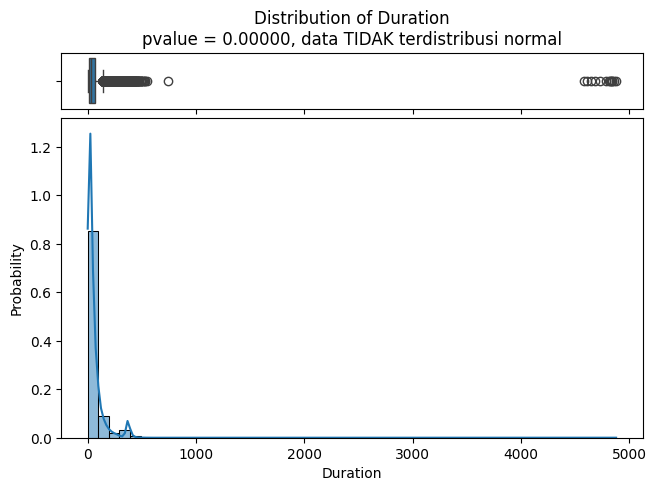

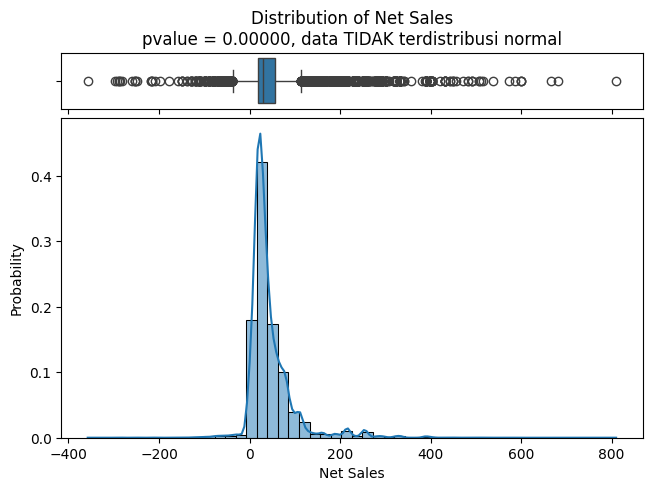

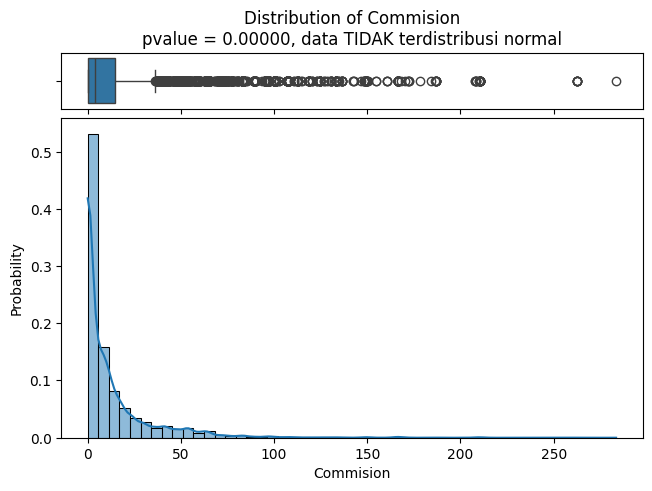

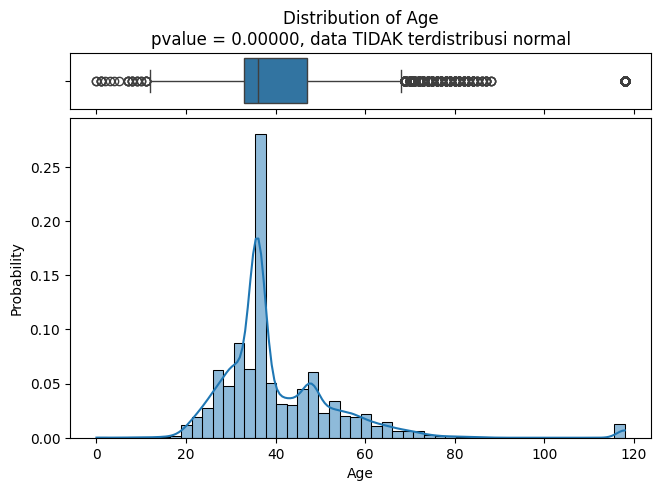

In [28]:
numerical = df.describe().columns

for kolom in numerical:
    fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (7.5,5), gridspec_kw={"height_ratios": (.15, .85),"hspace": 0.05})
    stat, pvalue = normaltest(df[kolom].dropna())

    if pvalue > 0.05 :
        distribusi = f'pvalue = {pvalue:.5f}, data terdistribusi normal'
    else :
        distribusi = f'pvalue = {pvalue:.5f}, data TIDAK terdistribusi normal'

    ax1.set_title(f"Distribution of {kolom}\n{distribusi}", color = "black")
    sns.boxplot(x = df[kolom], ax = ax1)
    ax1.set(xlabel = "")

    sns.histplot(data = df[kolom], ax = ax2, stat = "probability", kde=True, bins=50)

    plt.show()

In [29]:
df.dtypes

Agency                   object
Agency Type              object
Distribution Channel     object
Duration                  int64
Net Sales               float64
Commision               float64
Age                       int64
Claim                    object
Continen                 object
Product                  object
dtype: object

dapat disimpulkan bahwa :
data tipe kategorik yaitu Age, Commision, Net Sales dan Duration terdistribusi secara tidak normal dan memiliki outlier dimana P values < 0.05

berdasarkan persebaran data yang tidak normal ini dapat kita amati adanya anomali diantaranya sebagai berikut :
1. Duration ada yang memiliki nilai -1 dan hingga lebih dari 180
2. Net Sales bernilai negatif
3. Age ada yang berusia hingga lebih dari 100 tahun

adanya data anomalies ini akan kita berikan perlakuan untuk mengatasi-nya

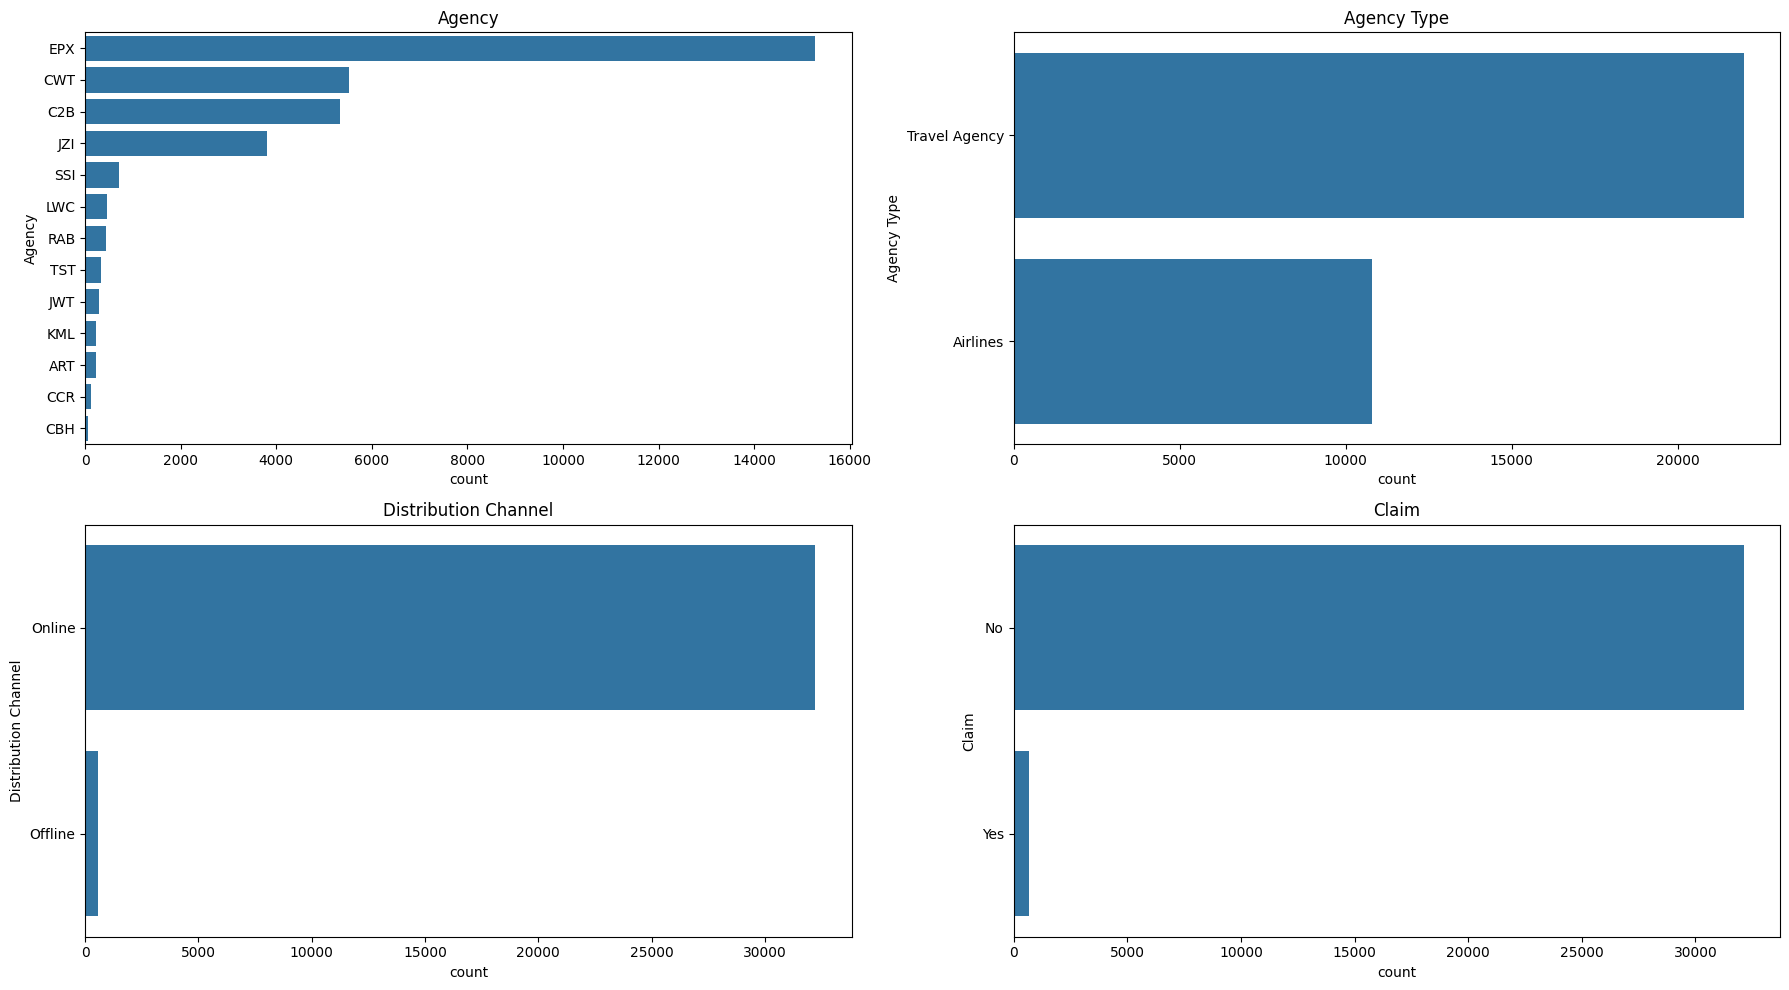

In [30]:
categorical = df.describe(include='object').columns
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
for i, j in zip(categorical, axes.flatten()):
    ax = sns.countplot(data=df, y= i, ax= j, order=df[i].value_counts().index)
    ax.set_title(f'{i}',size = 12)
plt.tight_layout()

plt.show()

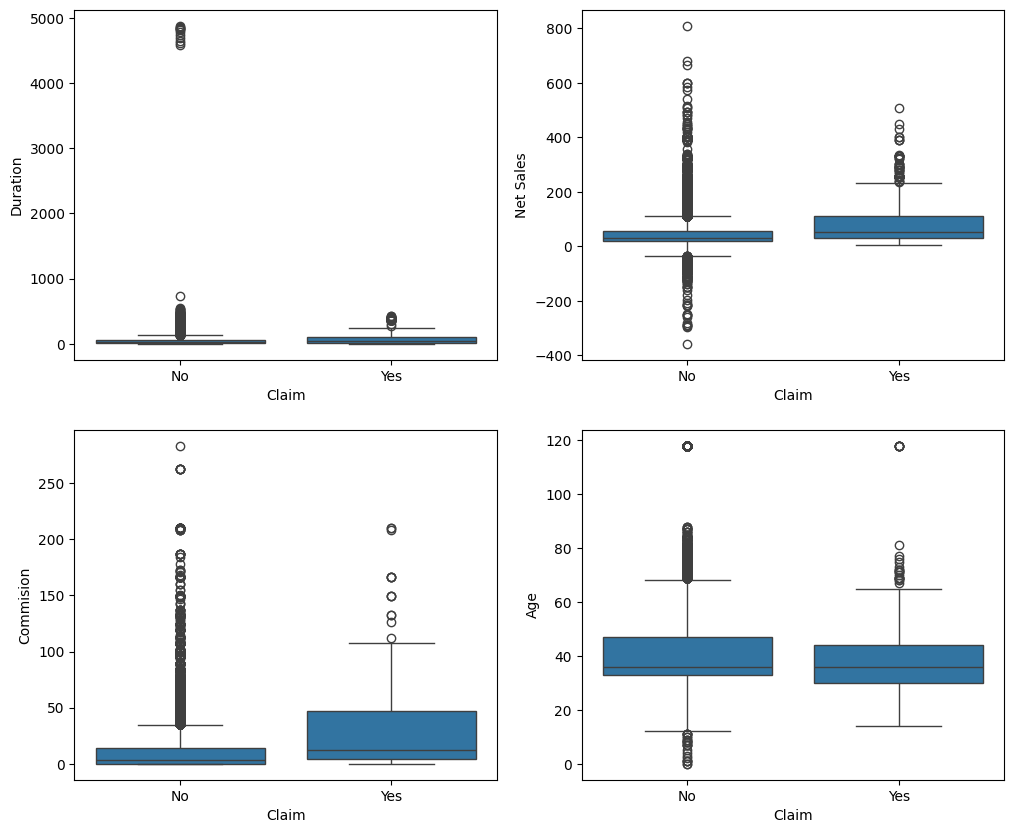

In [31]:
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.boxplot(data=df, y= 'Duration', x='Claim')

plt.subplot(222)
sns.boxplot(data=df, y= 'Net Sales', x='Claim')

plt.subplot(223)
sns.boxplot(data=df, y= 'Commision', x='Claim')

plt.subplot(224)
sns.boxplot(data=df, y= 'Age', x='Claim')
plt.show()

### 1.3.1  Kolom Duration

In [32]:
df['Duration'] = df['Duration'].replace([-1], 1)

# Re-check jumlah baris data (masih sama setelah penghapusan duplikat, yang berarti data tidak hilang namun berhasil direplace)
print('Jumlah baris data :', df.shape[0])

Jumlah baris data : 32783


permasalahan lain dalam durasi adalah data yang memiliki nilai hingga 4881 yang dimana hal ini tidak normal :
berdasarkan pada artikel yang bersumber dari
[Otoritas Jasa Keuangan](https://sikapiuangmu.ojk.go.id/FrontEnd/CMS/Article/20551) disebutkan bahwa sebagian besar asuransi perjalanan standar hanya melindungi hingga 30 hari, asuransi single-trip melindungi hingga 3 bulan (90 hari), dan untuk asuransi perjalanan jangka panjang umumnya mencakup perjalanan yang berlangsung hingga 6 bulan (180 hari). Mari kita tampilkan terlebih dahulu data dengan duration diatas 180  hari.

In [33]:
duration_outlier = df[df['Duration']>180]

In [34]:
print(len(duration_outlier))

2075


sebanyak 2159 data dengan durasi perjalanan lebih dari 180 hari ini akan dihapus dan data dengan durasi 0 tidak akan dihapus karena dianggap sebagai durasi perjalanan yang kurang dari 24 jam. Hal ini juga normal saja terjadi misalnya ketika seseorang harus melakukan perjalanan bisnis ke suatu kota namun harus kembali lagi ke kota asalnya pada hari yang sama

In [35]:
df.drop(duration_outlier.index, inplace=True)
# Re-check number of rows
print('number of rows:', df.shape[0])

number of rows: 30708


### 1.3.2  Kolom Age

Melalui deskripsi sebaran data dapat diketahui bahwa maksimal untuk age ada pada nilai 118, hal ini biasanya jarang terjadi dan kan dianggap sebagai data outlier. Berdasarkan [Otoritas Jasa Keuangan](https://sikapiuangmu.ojk.go.id/FrontEnd/CMS/Article/20551), meskipun kebanyakan agency hanya menyediakan perlindungan bagi pengguna yang berusia maksimum 80 Tahun karenanya data pengguna yang berusia lebih dari 80 tahun akan dihapus

In [36]:
age_outlier = df[df['Age']>80]
print(len(duration_outlier))

2075


In [37]:
df.drop(age_outlier.index, inplace=True)
# Re-check number of rows
print('number of rows:', df.shape[0])

number of rows: 30237


### 1.3.3  Net Sales dan Commision
Net Sales merupakan total penjualan bersih asuransi perjalanan. Net Sales yang bernilai negatif dapat didefinisikan sebagai kerugian dari penjualan kotor produk asuransi yang telah dikurangi retur, tunjangan, dan diskon.

Pemberian komisi / upah tambahan yang dilakukan oleh pihak perusahaan asuransi kepada agensi biasanya dilakukan ketika penghasilan dari penjualan produk asuransi telah mencapai / melebihi target (Net sales positif). Dengan begitu, ketika perusahaan mengalami kerugian (net sales minus), sangat mungkin bagi perusahaan untuk tidak memberikan komisi pada agensi (comission = 0). Namun, semua hal itu kembali lagi kepada kesepakatan yang telah dibuat antara pihak perusahaan asuransi dan agensi. Mari kita cek lebih lanjut untuk mengetahui apakah kita perlu menghapus data agency yang masih menerima komisi ketika net sales minus.

In [38]:
# Check agensi yang mendapatkan komisi saat Net Sales minus
com = df[(df['Net Sales']<0) & (df['Commision'] > 0)]
len(com)

294

In [39]:
# Check agensi yang mendapatkan komisi saat Net Sales plus
com1 = df[(df['Net Sales']>0) & (df['Commision'] > 0)]
len(com1)

14463

In [40]:
# Check agensi yang tidak mendapatkan komisi saat Net Sales plus
com2 = df[(df['Net Sales']>0) & (df['Commision'] == 0)]
len(com2)

14298

Simpulan : Pemberian komisi / upah tambahan yang dilakukan oleh pihak perusahaan asuransi kepada agen asuransi perjalanan bergantung dengan kesepakatan yang telah dibuat oleh kedua pihak. Oleh karena itu, wajar saja jika terdapat beberapa perusahaan yang memang menunjukkan net sales yang positif (untung) namun tidak memberi komisi pada agensi, dan ada juga yang tetap memberikan komisi meskipun net sales minus.

## 2. Data  Preprocessing

### 2.1 Mengubah data kolom claim

In [41]:
df['Claim'] = np.where(df['Claim']=='Yes', 1, 0)
df.head()

,Agency,Agency Type,Distribution Channel,Duration,Net Sales,Commision,Age,Claim,Continen,Product
1,EPX,Travel Agency,Online,4,10.0,0.0,33,0,ASIA,Basic Plan
2,JZI,Airlines,Online,19,22.0,7.7,26,0,ASIA,Basic Plan
3,EPX,Travel Agency,Online,20,112.0,0.0,59,0,SOUTH AMERICA,Comprehensive Plan
4,C2B,Airlines,Online,8,16.0,4.0,28,0,ASIA,Basic Plan
5,EPX,Travel Agency,Online,2,10.0,0.0,36,0,ASIA,Basic Plan


### 2.2 Rechek Imbalance Data

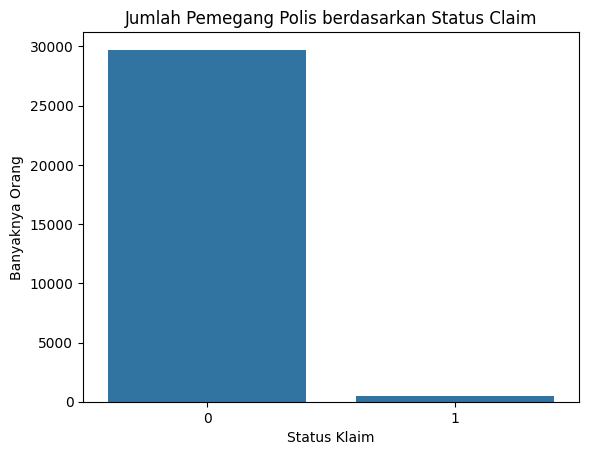

In [42]:
# Recheck imbalance data
claim = df.groupby(by=['Claim']).size().reset_index(name='counts')

sns.barplot(claim, x='Claim', y='counts')
plt.xlabel('Status Klaim')
plt.ylabel('Banyaknya Orang')
plt.title('Jumlah Pemegang Polis berdasarkan Status Claim')
plt.show()

dapat kita amati disini bahwa pengguna rata rata tidak mengajukan claim, grafik menujukkan bahwa adanya imbalanced antara pengguna yang mengajukan claim dan tidak

## 3. Data Preparation and Feature Engineering

### 3.1 Numerik Feature Exploration

In [43]:
df.select_dtypes('number').corr('spearman')

,Duration,Net Sales,Commision,Age,Claim
Duration,1.000000,0.177888,-0.027150,-0.045366,-0.006759
Net Sales,0.177888,1.000000,0.194627,-0.023079,0.055226
Commision,-0.027150,0.194627,1.000000,0.108494,0.057405
Age,-0.045366,-0.023079,0.108494,1.000000,-0.036911
Claim,-0.006759,0.055226,0.057405,-0.036911,1.000000


berdasarkan kolom disini kita dapat melihat bahwa data net sales dan commision memiliki distribusi yang sama yaitu mendekati kolom median sehingga disini kita bisa menghapus salah satunya

In [44]:
# Initialization
#Random State
rs=28
split_size = 0.2
#Metrics (f2 score)
metric = make_scorer(fbeta_score,beta=2)
sk = StratifiedKFold(n_splits=5, shuffle=True, random_state=rs)

#Scaler
robust = RobustScaler()

#Encoding
ohe = OneHotEncoder(drop='first',handle_unknown='ignore')
binary = BinaryEncoder()

#Sampling
ros = RandomOverSampler(random_state=rs)
rus = RandomUnderSampler(random_state=rs)
smotenn = SMOTEENN(random_state=rs)
smote = SMOTE(random_state=rs)
combine = SMOTEENN(random_state=rs)
cnn = CondensedNearestNeighbour(random_state=rs)

# Other Preprocessing
poly = PolynomialFeatures()
binning = KBinsDiscretizer()
select_feature = SelectKBest()

# Model Development
knn = KNeighborsClassifier()
logreg = LogisticRegression()
gbs = GradientBoostingClassifier(random_state=rs)
bagg=BaggingClassifier(estimator=LogisticRegression(),random_state=rs)
xgboost = XGBClassifier(random_state=rs)
lgbm = LGBMClassifier(random_state=rs)
rf= RandomForestClassifier(random_state=rs)
svc = SVC(random_state=28,probability=True)
f2score = make_scorer(fbeta_score,beta=2)

In [45]:
list_scaling = [robust]
list_encoding= [ohe]
list_estimator= [logreg, svc, knn, lgbm, gbs, xgboost]
list_sampler = [ros, rus, smotenn]

In [46]:
#Define Feature and Target
feature = df.drop(columns='Claim')
target = df['Claim']

In [47]:
X_train,X_test,y_train,y_test = train_test_split(feature,target, test_size=split_size, random_state=rs, stratify=target)

In [48]:
X_train.head()

,Agency,Agency Type,Distribution Channel,Duration,Net Sales,Commision,Age,Continen,Product
3900,EPX,Travel Agency,Online,70,80.0,0.00,69,SOUTH AMERICA,Basic Plan
37174,C2B,Airlines,Online,8,19.2,4.80,59,ASIA,Basic Plan
15411,EPX,Travel Agency,Online,35,45.0,0.00,36,EUROPE,Basic Plan
18844,CWT,Travel Agency,Online,40,29.7,17.82,31,EUROPE,Rental Plan
11019,C2B,Airlines,Online,9,20.0,5.00,26,ASIA,Basic Plan


In [49]:
# Transformer object

ohe_var = ['Agency Type','Distribution Channel']
bin_var = ['Agency', 'Product', 'Continen']
num_var = ['Net Sales', 'Commision', 'Age']

transformer = ColumnTransformer(transformers=[
    ('encoding_ohe', ohe, ohe_var),
    ('encoding_binary', binary,bin_var),
    ('scaling', robust, num_var)
],remainder='passthrough')

dilakukan feature selection untuk mengurangi banyaknya fitting pada data dikarenakan banyaknya orang yang mengajukan claim sangat sedikit diambil data dengan kelompok yang terbesar karena data tersebut sudah mewakili keseluruhan kelompok data dsini diambil 25 fitur dan metode yang digunakan adalah perecntile

### Feature Selection

## **4. Model Benchmarking**
### 4.1 Model without Tuning matriks Recall

In [50]:
estimator=imb_pipeline([
    ('preprocess',transformer),
    ('sampler',list_sampler),
    ('model',i)])

param_space = {
    'sampler' : list_sampler,
    'model' : list_estimator}

grid_search = GridSearchCV(
    estimator= estimator,
    param_grid=param_space,
    cv= sk,
    scoring = 'recall',
    return_train_score=True,
    verbose=1)

In [ ]:
# grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[LightGBM] [Info] Number of positive: 19021, number of negative: 19021
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005931 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 738
[LightGBM] [Info] Number of data points in the train set: 38042, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 19021, number of negative: 19021
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 747
[LightGBM] [Info] Number of data points in the train set: 38042, number of used features: 17
[LightGBM] [In

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=28, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('encoding_ohe',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['Agency '
                                                                          'Type',
                                                                          'Distribution '
                                                                          'Channel']),
                                                                        ('encoding_binary',
                                                                         BinaryEncoder(),
                                                                         ['Agency',
                                                                          'Product',
                                                                          'Continen']),
                                                                        ('s...
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=28, ...)],
                         'sampler': [RandomOverSampler(random_state=28),
                                     RandomUnderSampler(random_state=28),
                                     SMOTEENN(random_state=28)]},
             return_train_score=True, scoring='recall', verbose=1)

In [ ]:
pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_sampler,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
16,1.319051,0.374253,0.128525,0.034843,"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n multi_strategy=None, n_estimators=None, n_jobs=None,\n num_parallel_tree=None, random_state=28, ...)",RandomUnderSampler(random_state=28),"{'model': XGBClassifier(base_score=None, booster=None, callbacks=None, colsample_bylevel=None, colsample_bynode=None, colsample_bytree=None, device=None, early_stopping_rounds=None, enable_categorical=False, eval_metric=None, feature_types=None, gamma=None, grow_policy=None, importance_type=None, interaction_constraints=None, learning_rate=None, max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=None, max_depth=None, max_leaves=None, min_child_weight=None, missing=nan, monotone_constraints=None, multi_strategy=None, n_estimators=None, n_jobs=None, num_parallel_tree=None, random_state=28, ...), 'sampler': RandomUnderSampler(random_state=28)}",0.780488,0.695122,0.626506,0.746988,0.695122,0.708845,0.052429,1,1.000000,1.000000,1.000000,0.996960,0.996970,0.998786,0.001487
13,0.726327,0.199417,0.073951,0.019607,GradientBoostingClassifier(random_state=28),RandomUnderSampler(random_state=28),"{'model': GradientBoostingClassifier(random_state=28), 'sampler': RandomUnderSampler(random_state=28)}",0.768293,0.670732,0.722892,0.674699,0.695122,0.706347,0.036075,2,0.839394,0.857576,0.875380,0.848024,0.787879,0.841651,0.029422
10,0.211288,0.007889,0.056827,0.001605,LGBMClassifier(random_state=28),RandomUnderSampler(random_state=28),"{'model': LGBMClassifier(random_state=28), 'sampler': RandomUnderSampler(random_state=28)}",0.768293,0.634146,0.650602,0.698795,0.695122,0.689392,0.046698,3,0.951515,0.957576,0.966565,0.939210,0.957576,0.954488,0.009024
0,0.413688,0.039351,0.023902,0.001375,LogisticRegression(),RandomOverSampler(random_state=28),"{'model': LogisticRegression(), 'sampler': RandomOverSampler(random_state=28)}",0.682927,0.573171,0.746988,0.674699,0.621951,0.659947,0.058814,4,0.706061,0.681818,0.671733,0.674772,0.663636,0.679604,0.014458
4,0.317492,0.135656,0.457462,0.146827,"SVC(probability=True, random_state=28)",RandomUnderSampler(random_state=28),"{'model': SVC(probability=True, random_state=28), 'sampler': RandomUnderSampler(random_state=28)}",0.621951,0.756098,0.734940,0.554217,0.621951,0.657831,0.076043,5,0.712121,0.715152,0.717325,0.580547,0.569697,0.658968,0.068566
1,0.119982,0.005365,0.020557,0.001224,LogisticRegression(),RandomUnderSampler(random_state=28),"{'model': LogisticRegression(), 'sampler': RandomUnderSampler(random_state=28)}",0.682927,0.585366,0.710843,0.674699,0.597561,0.650279,0.049645,6,0.675758,0.693939,0.693009,0.674772,0.630303,0.673556,0.023113
12,7.896424,1.617763,0.068808,0.023023,GradientBoostingClassifier(random_state=28),RandomOverSampler(random_state=28),"{'model': GradientBoostingClassifier(random_state=28), 'sampler': RandomOverSampler(random_state=28)}",0.670732,0.621951,0.638554,0.614458,0.621951,0.633529,0.020204,7,0.787879,0.824242,0.814590,0.835866,0.800000,0.812515,0.017033
2,3.855093,0.152372,0.026685,0.001730,LogisticRegression(),SMOTEENN(random_state=28),"{'model': LogisticRegression(), 'sampler': SMOTEENN(random

In [ ]:
# score recall
grid_search.best_score_

0.7088451366441374

In [ ]:
grid_search.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoding_ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Agency Type',
                                                   'Distribution Channel']),
                                                 ('encoding_binary',
                                                  BinaryEncoder(),
                                                  ['Agency', 'Product',
                                                   'Continen']),
                                                 ('scaling', RobustScaler(),
                                                  ['Net Sales', 'Commision',
                                                   'Age'])])),
                ('sampler', RandomUnderSampler...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=28, ...))])

In [ ]:
grid_search.best_params_

{'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=28, ...),
 'sampler': RandomUnderSampler(random_state=28)}

### **Predict the model to test set**

In [ ]:
# define model
model = grid_search.best_estimator_
# fitting
model.fit(X_train, y_train)
# predict
y_pred = model.predict(X_test)
# evaluate (recall score)
recall_score(y_test, y_pred)

0.6213592233009708

### **Confussion Matrix**

In [ ]:
# without tuning
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.67      0.80      5945
           1       0.03      0.62      0.06       103

    accuracy                           0.67      6048
   macro avg       0.51      0.64      0.43      6048
weighted avg       0.97      0.67      0.78      6048



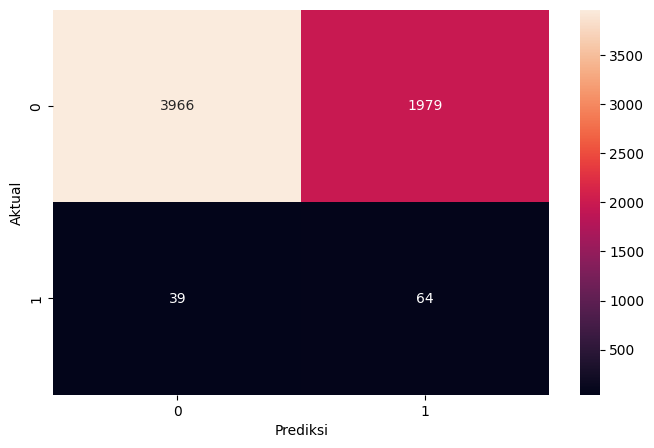

In [ ]:
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', ax=ax)
plt.xlabel('Prediksi')
plt.ylabel('Aktual');

Pembahasan :
berdasarkan model yang kita lakukan dapat disimpulkan sebagai berikut :
`XGB` adalah metode tuning yang terbaik
`Matrix Recall` digunakan karena kita ingin berfokus kepada gologan orang yang mengajukan klaim asuransi perjalanan mereka sehingga orang yang berpotensi mengajukan claim dan mengambil claim dapat dideteksi untuk keputusan pengambilan keputusan bisini yang akan dilakukan
- Berdasarkan matrix yang dihasilkan kita dapat menyimpulkan sebagai berikut :
    1. Matrix recall menunjukkan hasil sebagai berikut : XGB, dengan Sampling RUS
    2. Adapun untuk matriks yang lainnya seebagai berikut :
        - GBS dengan sampling RUS
        - LGBM dengan sampling RUS
        - Logreg dengan sampling RUS
        berdasarkan data tersebut maka kita akan melakukan tuning parameter berdasarkan keempat model yang memberikan hasil terbaik 

### 4.2 Model with Tuning matriks Recall
### 4.2.1 Best Model 1 XGB dan RUS

In [51]:
xgb = XGBClassifier()
xgb1 = XGBClassifier(learning_rate =0.1,n_estimators=10,max_depth=5,min_child_weight=2,gamma=0.1,subsample=0.85,colsample_bytree=0.8,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,
                     seed=27)
xgb2 = XGBClassifier(learning_rate =0.01,n_estimators=5000,max_depth=4,min_child_weight=6,gamma=0,subsample=0.8,colsample_bytree=0.8,reg_alpha=0.005,objective= 'binary:logistic',nthread=4,
                     scale_pos_weight=1,seed=27)

In [52]:
xgbMod = [xgb, xgb1, xgb2]

In [53]:
estimator_tuning1=imb_pipeline([
    ('preprocess',transformer),
    ('sampler',rus),
    ('model',xgb)])

param_space_tuning1 = {
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.1, 0.01, 0.001],
    'model__subsample': [0.5, 0.7, 1]}

grid_search_tuning1 = GridSearchCV(
    estimator= estimator_tuning1,
    param_grid=param_space_tuning1,
    cv= sk,
    scoring = 'recall',
    return_train_score=True,
    verbose=1)

In [54]:
grid_search_tuning1.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=28, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('encoding_ohe',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['Agency '
                                                                          'Type',
                                                                          'Distribution '
                                                                          'Channel']),
                                                                        ('encoding_binary',
                                                                         BinaryEncoder(),
                                                                         ['Agency',
                                                                          'Product',
                                                                          'Continen']),
                                                                        ('s...
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             param_grid={'model__learning_rate': [0.1, 0.01, 0.001],
                         'model__max_depth': [3, 5, 7],
                         'model__subsample': [0.5, 0.7, 1]},
             return_train_score=True, scoring='recall', verbose=1)

In [55]:
pd.DataFrame(grid_search_tuning1.cv_results_).sort_values('rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__learning_rate,param_model__max_depth,param_model__subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
25,0.170023,0.003521,0.041126,0.004027,0.001,7,0.7,"{'model__learning_rate': 0.001, 'model__max_depth': 7, 'model__subsample': 0.7}",0.865854,0.670732,0.759036,0.734940,0.695122,0.745137,0.067687,1,0.824242,0.821212,0.838906,0.838906,0.796970,0.824047,0.015381
8,0.167874,0.011373,0.037002,0.000503,0.1,7,1,"{'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__subsample': 1}",0.841463,0.682927,0.710843,0.771084,0.707317,0.742727,0.057270,2,0.942424,0.975758,0.972644,0.957447,0.963636,0.962382,0.011903
22,0.145624,0.003190,0.036281,0.004751,0.001,5,0.7,"{'model__learning_rate': 0.001, 'model__max_depth': 5, 'model__subsample': 0.7}",0.878049,0.646341,0.771084,0.734940,0.670732,0.740229,0.081999,3,0.812121,0.809091,0.841945,0.808511,0.736364,0.801606,0.034923
13,0.150884,0.005649,0.034823,0.001811,0.01,5,0.7,"{'model__learning_rate': 0.01, 'model__max_depth': 5, 'model__subsample': 0.7}",0.865854,0.646341,0.746988,0.734940,0.682927,0.735410,0.074616,4,0.809091,0.803030,0.835866,0.811550,0.742424,0.800392,0.031067
20,0.127063,0.003780,0.030723,0.002357,0.001,3,1,"{'model__learning_rate': 0.001, 'model__max_depth': 3, 'model__subsample': 1}",0.878049,0.682927,0.795181,0.626506,0.670732,0.730679,0.092308,5,0.833333,0.751515,0.811550,0.629179,0.712121,0.747540,0.073126
16,0.170062,0.003696,0.039872,0.001330,0.01,7,0.7,"{'model__learning_rate': 0.01, 'model__max_depth': 7, 'model__subsample': 0.7}",0.817073,0.682927,0.722892,0.722892,0.707317,0.730620,0.045632,6,0.833333,0.821212,0.848024,0.844985,0.809091,0.831329,0.014602
0,0.142372,0.016795,0.030193,0.001642,0.1,3,0.5,"{'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__subsample': 0.5}",0.829268,0.682927,0.698795,0.698795,0.731707,0.728299,0.052926,7,0.796970,0.809091,0.835866,0.787234,0.787879,0.803408,0.018056
15,0.165766,0.004240,0.043568,0.005363,0.01,7,0.5,"{'model__learning_rate': 0.01, 'model__max_depth': 7, 'model__subsample': 0.5}",0.829268,0.646341,0.710843,0.722892,0.731707,0.728210,0.058749,8,0.821212,0.815152,0.823708,0.814590,0.778788,0.810690,0.016328
17,0.377433,0.379128,0.046613,0.015028,0.01,7,1,"{'model__learning_rate': 0.01, 'model__max_depth': 7, 'model__subsample': 1}",0.829268,0.682927,0.746988,0.722892,0.658537,0.728122,0.059158,9,0.854545,0.839394,0.866261,0.835866,0.836364,0.846486,0.012013
12,0.152140,0.006462,0.034161,0.000477,0.01,5,0.5,"{'model__learning_rate': 0.01, 'model__max_depth': 5, 'model__subsample': 0.5}",0.829268,0.646341,0.722892,0.722892,0.707317,0.725742,0.058954,10,0.806061,0.803030,0.814590,0.775076,0.739394,0.787630,0.027525


In [56]:
# score recall
grid_search_tuning1.best_score_

0.7451366441375258

In [57]:
grid_search_tuning1.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoding_ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Agency Type',
                                                   'Distribution Channel']),
                                                 ('encoding_binary',
                                                  BinaryEncoder(),
                                                  ['Agency', 'Product',
                                                   'Continen']),
                                                 ('scaling', RobustScaler(),
                                                  ['Net Sales', 'Commision',
                                                   'Age'])])),
                ('sampler', RandomUnderSampler...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.001, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=7,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=None,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, ...))])

In [58]:
grid_search_tuning1.best_params_

{'model__learning_rate': 0.001, 'model__max_depth': 7, 'model__subsample': 0.7}

### **Predict the model to test set**

In [59]:
# define model
model1 = grid_search_tuning1.best_estimator_
# fitting
model1.fit(X_train, y_train)
# predict
y_pred1 = model1.predict(X_test)
# evaluate (recall score)
recall_score(y_test, y_pred1)

0.6990291262135923

### **Confussion Matrix**

In [60]:
# tuning parameter XGB
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.99      0.69      0.81      5945
           1       0.04      0.70      0.07       103

    accuracy                           0.69      6048
   macro avg       0.51      0.69      0.44      6048
weighted avg       0.98      0.69      0.80      6048



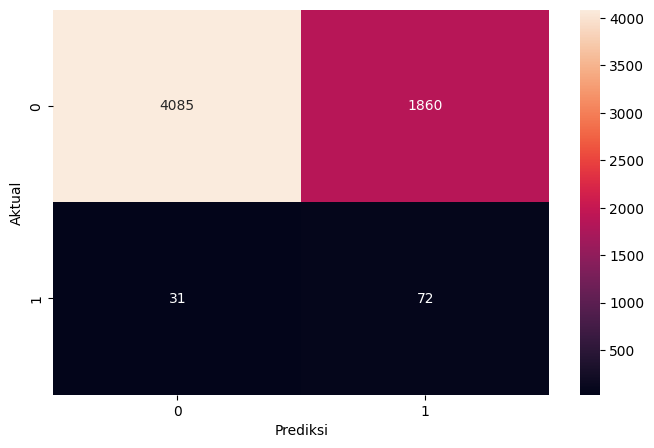

In [61]:
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred1), annot=True, fmt='.0f', ax=ax)
plt.xlabel('Prediksi')
plt.ylabel('Aktual');

### 4.2.2 Best Model 2 GBS dan RUS

In [ ]:
estimator_tuning2=imb_pipeline([
    ('preprocess',transformer),
    ('sampler',rus),
    ('model',gbs)])

param_space_tuning2 = {
    'model__n_estimators': np.arange(50, 251, 5),
    'model__learning_rate': np.linspace(0.01, 0.2, 5),
    'model__max_depth': np.arange(3, 8,2),
    'model__min_samples_leaf' : np.linspace(0.1, 0.5, 5, endpoint=True)}

grid_search_tuning2 = GridSearchCV(
    estimator= estimator_tuning2,
    param_grid=param_space_tuning2,
    cv= sk,
    scoring = 'recall',
    return_train_score=True,
    verbose=1)

In [ ]:
grid_search_tuning2.fit(X_train, y_train)

Fitting 5 folds for each of 3075 candidates, totalling 15375 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=28, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('encoding_ohe',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['Agency '
                                                                          'Type',
                                                                          'Distribution '
                                                                          'Channel']),
                                                                        ('encoding_binary',
                                                                         BinaryEncoder(),
                                                                         ['Agency',
                                                                          'Product',
                                                                          'Continen']),
                                                                        ('s...
             param_grid={'model__learning_rate': array([0.01  , 0.0575, 0.105 , 0.1525, 0.2   ]),
                         'model__max_depth': array([3, 5, 7]),
                         'model__min_samples_leaf': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                         'model__n_estimators': array([ 50,  55,  60,  65,  70,  75,  80,  85,  90,  95, 100, 105, 110,
       115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175,
       180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240,
       245, 250])},
             return_train_score=True, scoring='recall', verbose=1)

In [ ]:
pd.DataFrame(grid_search_tuning2.cv_results_).sort_values('rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__learning_rate,param_model__max_depth,param_model__min_samples_leaf,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
3074,1.077320,0.076114,0.084027,0.011501,0.2,7,0.5,250,"{'model__learning_rate': 0.2, 'model__max_depth': 7, 'model__min_samples_leaf': 0.5, 'model__n_estimators': 250}",0.621951,1.0,1.0,1.0,0.560976,0.836585,0.201068,1,0.593939,1.0,1.0,1.0,0.557576,0.830303,0.208153
1023,0.222267,0.010867,0.018740,0.002402,0.0575,5,0.5,245,"{'model__learning_rate': 0.0575, 'model__max_depth': 5, 'model__min_samples_leaf': 0.5, 'model__n_estimators': 245}",0.621951,1.0,1.0,1.0,0.560976,0.836585,0.201068,1,0.593939,1.0,1.0,1.0,0.557576,0.830303,0.208153
1024,0.222442,0.008279,0.018989,0.003032,0.0575,5,0.5,250,"{'model__learning_rate': 0.0575, 'model__max_depth': 5, 'model__min_samples_leaf': 0.5, 'model__n_estimators': 250}",0.621951,1.0,1.0,1.0,0.560976,0.836585,0.201068,1,0.593939,1.0,1.0,1.0,0.557576,0.830303,0.208153
1189,0.100262,0.002296,0.016148,0.000757,0.0575,7,0.5,50,"{'model__learning_rate': 0.0575, 'model__max_depth': 7, 'model__min_samples_leaf': 0.5, 'model__n_estimators': 50}",0.621951,1.0,1.0,1.0,0.560976,0.836585,0.201068,1,0.593939,1.0,1.0,1.0,0.557576,0.830303,0.208153
1190,0.105750,0.002000,0.016865,0.000854,0.0575,7,0.5,55,"{'model__learning_rate': 0.0575, 'model__max_depth': 7, 'model__min_samples_leaf': 0.5, 'model__n_estimators': 55}",0.621951,1.0,1.0,1.0,0.560976,0.836585,0.201068,1,0.593939,1.0,1.0,1.0,0.557576,0.830303,0.208153
1191,0.120906,0.006558,0.018581,0.001902,0.0575,7,0.5,60,"{'model__learning_rate': 0.0575, 'model__max_depth': 7, 'model__min_samples_leaf': 0.5, 'model__n_estimators': 60}",0.621951,1.0,1.0,1.0,0.560976,0.836585,0.201068,1,0.593939,1.0,1.0,1.0,0.557576,0.830303,0.208153
1192,0.117809,0.005079,0.017721,0.001622,0.0575,7,0.5,65,"{'model__learning_rate': 0.0575, 'model__max_depth': 7, 'model__min_samples_leaf': 0.5, 'model__n_estimators': 65}",0.621951,1.0,1.0,1.0,0.560976,0.836585,0.201068,1,0.593939,1.0,1.0,1.0,0.557576,0.830303,0.208153
1193,0.114612,0.002679,0.017063,0.001099,0.0575,7,0.5,70,"{'model__learning_rate': 0.0575, 'model__max_depth': 7, 'model__min_samples_leaf': 0.5, 'model__n_estimators': 70}",0.621951,1.0,1.0,1.0,0.560976,0.836585,0.201068,1,0.593939,1.0,1.0,1.0,0.557576,0.830303,0.208153
1194,0.119711,0.001900,0.017313,0.001215,0.0575,7,0.5,75,"{'model__learning_rate': 0.0575, 'model__max_depth': 7, 'model__min_samples_leaf': 0.5, 'model__n_estimators': 75}",0.621951,1.0,1.0,1.0,0.560976,0.836585,0.201068,1,0.593939,1.0,1.0,1.0,0.557576,0.830303,0.208153
1195,0.125161,0.006464,0.017636,0.001151,0.0575,7,0.5,80,"{'model__learning_rate': 0.0575, 'model__max_depth': 7, 'model__min_samples_leaf': 0.5, 'model__n_estimators': 80}",0.621951,1.0,1.0,1.0,0.560976,0.836585,0.201068,1,0.593939,1.0,1.0,1.0,0.557576,0.830303,0.208153


In [ ]:
# score recall
grid_search_tuning2.best_score_

0.8365853658536586

In [ ]:
model2 = grid_search_tuning2.best_score_

In [ ]:
grid_search_tuning2.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoding_ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Agency Type',
                                                   'Distribution Channel']),
                                                 ('encoding_binary',
                                                  BinaryEncoder(),
                                                  ['Agency', 'Product',
                                                   'Continen']),
                                                 ('scaling', RobustScaler(),
                                                  ['Net Sales', 'Commision',
                                                   'Age'])])),
                ('sampler', RandomUnderSampler(random_state=28)),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.01,
                                            min_samples_leaf=0.5,
                                            n_estimators=50,
                                            random_state=28))])

In [ ]:
grid_search_tuning2.best_params_

{'model__learning_rate': 0.01,
 'model__max_depth': 3,
 'model__min_samples_leaf': 0.5,
 'model__n_estimators': 50}

### **Predict the model to test set**

In [ ]:
# define model
model2 = grid_search_tuning2.best_estimator_
# fitting
model2.fit(X_train, y_train)
# predict
y_pred2 = model2.predict(X_test)
# evaluate (recall score)
recall_score(y_test, y_pred2)

1.0

### **Confussion Matrix**

In [ ]:
# tuning parameter GBS
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5945
           1       0.02      1.00      0.03       103

    accuracy                           0.02      6048
   macro avg       0.01      0.50      0.02      6048
weighted avg       0.00      0.02      0.00      6048



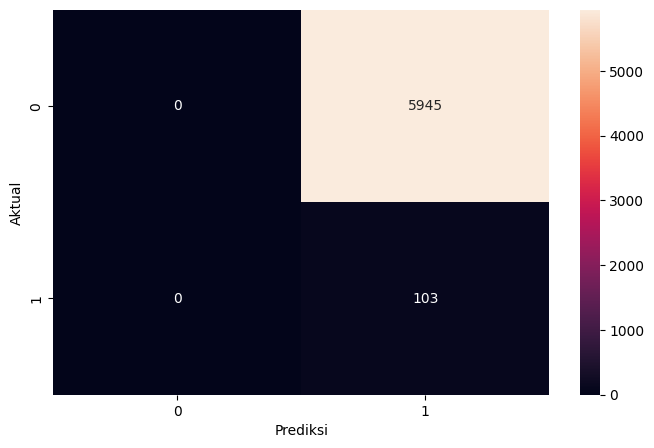

In [ ]:
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, fmt='.0f', ax=ax)
plt.xlabel('Prediksi')
plt.ylabel('Aktual');

### 4.2.3 Best Model 3 LGB dan RUS

In [68]:
estimator_tuning3=imb_pipeline([
    ('preprocess',transformer),
    ('sampler',rus),
    ('model', lgbm)])

param_space_tuning3 = {
    'model__num_leaves': [5, 20, 31],
    'model__learning_rate': [0.05, 0.1, 0.2],
    'model__n_estimators': [50, 100, 150],}

grid_search_tuning3 = GridSearchCV(
    estimator= estimator_tuning3,
    param_grid=param_space_tuning3,
    cv= sk,
    scoring = 'recall',
    return_train_score=True,
    verbose=1)

In [69]:
grid_search_tuning3.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=28, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('encoding_ohe',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['Agency '
                                                                          'Type',
                                                                          'Distribution '
                                                                          'Channel']),
                                                                        ('encoding_binary',
                                                                         BinaryEncoder(),
                                                                         ['Agency',
                                                                          'Product',
                                                                          'Continen']),
                                                                        ('scaling',
                                                                         RobustScaler(),
                                                                         ['Net '
                                                                          'Sales',
                                                                          'Commision',
                                                                          'Age'])])),
                                       ('sampler',
                                        RandomUnderSampler(random_state=28)),
                                       ('model',
                                        LGBMClassifier(random_state=28))]),
             param_grid={'model__learning_rate': [0.05, 0.1, 0.2],
                         'model__n_estimators': [50, 100, 150],
                         'model__num_leaves': [5, 20, 31]},
             return_train_score=True, scoring='recall', verbose=1)

In [70]:
pd.DataFrame(grid_search_tuning3.cv_results_).sort_values('rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__learning_rate,param_model__n_estimators,param_model__num_leaves,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
2,0.144537,0.010375,0.042630,0.002681,0.05,50,31,"{'model__learning_rate': 0.05, 'model__n_estimators': 50, 'model__num_leaves': 31}",0.841463,0.646341,0.734940,0.710843,0.743902,0.735498,0.063018,1,0.830303,0.803030,0.826748,0.823708,0.818182,0.820394,0.009549
21,0.120620,0.004383,0.041209,0.001480,0.2,100,5,"{'model__learning_rate': 0.2, 'model__n_estimators': 100, 'model__num_leaves': 5}",0.853659,0.670732,0.686747,0.734940,0.707317,0.730679,0.065133,2,0.836364,0.845455,0.869301,0.829787,0.793939,0.834969,0.024498
10,0.133728,0.009946,0.047132,0.002720,0.1,50,20,"{'model__learning_rate': 0.1, 'model__n_estimators': 50, 'model__num_leaves': 20}",0.817073,0.670732,0.710843,0.722892,0.731707,0.730649,0.047985,3,0.866667,0.875758,0.893617,0.866261,0.863636,0.873188,0.011006
1,0.124677,0.006968,0.039566,0.001073,0.05,50,20,"{'model__learning_rate': 0.05, 'model__n_estimators': 50, 'model__num_leaves': 20}",0.829268,0.621951,0.759036,0.698795,0.731707,0.728152,0.068310,4,0.809091,0.806061,0.826748,0.814590,0.812121,0.813722,0.007115
4,0.140288,0.002206,0.061005,0.000776,0.05,100,20,"{'model__learning_rate': 0.05, 'model__n_estimators': 100, 'model__num_leaves': 20}",0.841463,0.670732,0.722892,0.698795,0.695122,0.725801,0.060149,5,0.875758,0.872727,0.878419,0.860182,0.866667,0.870751,0.006575
15,0.119665,0.004990,0.050213,0.001217,0.1,150,5,"{'model__learning_rate': 0.1, 'model__n_estimators': 150, 'model__num_leaves': 5}",0.865854,0.670732,0.698795,0.698795,0.670732,0.720981,0.073515,6,0.812121,0.821212,0.848024,0.820669,0.760606,0.812526,0.028628
12,0.182020,0.009847,0.063391,0.006507,0.1,100,5,"{'model__learning_rate': 0.1, 'model__n_estimators': 100, 'model__num_leaves': 5}",0.829268,0.658537,0.734940,0.698795,0.682927,0.720893,0.059600,7,0.800000,0.818182,0.832827,0.793313,0.730303,0.794925,0.035162
11,0.176427,0.031911,0.054912,0.007358,0.1,50,31,"{'model__learning_rate': 0.1, 'model__n_estimators': 50, 'model__num_leaves': 31}",0.804878,0.682927,0.674699,0.686747,0.743902,0.718631,0.049596,8,0.887879,0.893939,0.899696,0.866261,0.893939,0.888343,0.011656
24,0.157223,0.034374,0.061728,0.009648,0.2,150,5,"{'model__learning_rate': 0.2, 'model__n_estimators': 150, 'model__num_leaves': 5}",0.804878,0.670732,0.686747,0.722892,0.707317,0.718513,0.046681,9,0.860606,0.860606,0.884498,0.854103,0.842424,0.860448,0.013737
18,0.153944,0.021892,0.041667,0.006239,0.2,50,5,"{'model__learning_rate': 0.2, 'model__n_estimators': 50, 'model__num_leaves': 5}",0.817073,0.670732,0.710843,0.722892,0.670732,0.718454,0.053588,10,0.784848,0.803030,0.832827,0.805471,0.745455,0.794326,0.028846


In [71]:
# score recall
grid_search_tuning3.best_score_

0.7354980899206582

In [72]:
grid_search_tuning3.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoding_ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Agency Type',
                                                   'Distribution Channel']),
                                                 ('encoding_binary',
                                                  BinaryEncoder(),
                                                  ['Agency', 'Product',
                                                   'Continen']),
                                                 ('scaling', RobustScaler(),
                                                  ['Net Sales', 'Commision',
                                                   'Age'])])),
                ('sampler', RandomUnderSampler(random_state=28)),
                ('model',
                 LGBMClassifier(learning_rate=0.05, n_estimators=50,
                                random_state=28))])

In [73]:
grid_search_tuning3.best_params_

{'model__learning_rate': 0.05,
 'model__n_estimators': 50,
 'model__num_leaves': 31}

### **Predict the model to test set**

In [74]:
# define model
model3 = grid_search_tuning3.best_estimator_
# fitting
model3.fit(X_train, y_train)
# predict
y_pred3 = model3.predict(X_test)
# evaluate (recall score)
recall_score(y_test, y_pred3)

[LightGBM] [Info] Number of positive: 412, number of negative: 412
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 377
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

0.7281553398058253

### **Confussion Matrix**

In [78]:
# tuning lgb
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.99      0.69      0.82      5945
           1       0.04      0.73      0.07       103

    accuracy                           0.69      6048
   macro avg       0.52      0.71      0.45      6048
weighted avg       0.98      0.69      0.80      6048



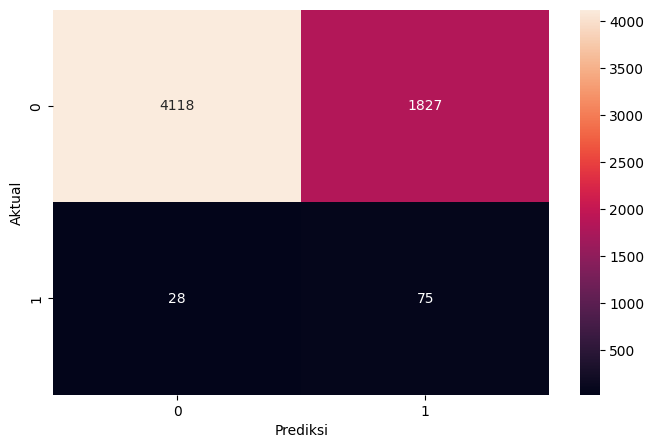

In [79]:
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred3), annot=True, fmt='.0f', ax=ax)
plt.xlabel('Prediksi')
plt.ylabel('Aktual');

### 4.2.3 Best Model 3 LOGREG dan ROS

In [ ]:
estimator_tuning4=imb_pipeline([
    ('preprocess',transformer),
    ('sampler',ros),
    ('model', logreg)])

param_space_tuning4 = {
    'model__penalty':[None, 'l1', 'l2', 'elasticnet'],
    'model__tol':[1e-4,1e-3,1e-2,1,10,100],
    'model__C':[1,10,0.1,0.01,100,0.001],
    'model__solver':['liblinear','newton-cg','lbfgs','newton-cholesky'],
    'model__max_iter':[1000]}

grid_search_tuning4 = GridSearchCV(
    estimator= estimator_tuning4,
    param_grid=param_space_tuning4,
    cv= sk,
    scoring = 'recall',
    return_train_score=True,
    verbose=1)

In [ ]:
grid_search_tuning4.fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=28, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('encoding_ohe',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['Agency '
                                                                          'Type',
                                                                          'Distribution '
                                                                          'Channel']),
                                                                        ('encoding_binary',
                                                                         BinaryEncoder(),
                                                                         ['Agency',
                                                                          'Product',
                                                                          'Continen']),
                                                                        ('s...
                                        RandomOverSampler(random_state=28)),
                                       ('model', LogisticRegression())]),
             param_grid={'model__C': [1, 10, 0.1, 0.01, 100, 0.001],
                         'model__max_iter': [1000],
                         'model__penalty': [None, 'l1', 'l2', 'elasticnet'],
                         'model__solver': ['liblinear', 'newton-cg', 'lbfgs',
                                           'newton-cholesky'],
                         'model__tol': [0.0001, 0.001, 0.01, 1, 10, 100]},
             return_train_score=True, scoring='recall', verbose=1)

In [ ]:
pd.DataFrame(grid_search_tuning4.cv_results_).sort_values('rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__max_iter,param_model__penalty,param_model__solver,param_model__tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
505,0.168985,0.034189,0.025194,0.001635,0.001,1000,l1,liblinear,0.001,"{'model__C': 0.001, 'model__max_iter': 1000, 'model__penalty': 'l1', 'model__solver': 'liblinear', 'model__tol': 0.001}",0.707317,0.646341,0.710843,0.698795,0.695122,0.691684,0.023366,1,0.706061,0.690909,0.711246,0.708207,0.696970,0.702678,0.007570
506,0.172993,0.039633,0.030464,0.007736,0.001,1000,l1,liblinear,0.01,"{'model__C': 0.001, 'model__max_iter': 1000, 'model__penalty': 'l1', 'model__solver': 'liblinear', 'model__tol': 0.01}",0.707317,0.646341,0.710843,0.698795,0.695122,0.691684,0.023366,1,0.709091,0.690909,0.711246,0.705167,0.696970,0.702677,0.007640
504,0.167020,0.032638,0.025226,0.001656,0.001,1000,l1,liblinear,0.0001,"{'model__C': 0.001, 'model__max_iter': 1000, 'model__penalty': 'l1', 'model__solver': 'liblinear', 'model__tol': 0.0001}",0.707317,0.646341,0.710843,0.698795,0.695122,0.691684,0.023366,1,0.706061,0.690909,0.711246,0.708207,0.696970,0.702678,0.007570
507,0.192045,0.003825,0.039099,0.003036,0.001,1000,l1,liblinear,1,"{'model__C': 0.001, 'model__max_iter': 1000, 'model__penalty': 'l1', 'model__solver': 'liblinear', 'model__tol': 1}",0.707317,0.658537,0.698795,0.674699,0.682927,0.684455,0.017307,4,0.706061,0.684848,0.714286,0.708207,0.684848,0.699650,0.012383
545,0.456996,0.099485,0.036421,0.005074,0.001,1000,l2,lbfgs,100,"{'model__C': 0.001, 'model__max_iter': 1000, 'model__penalty': 'l2', 'model__solver': 'lbfgs', 'model__tol': 100}",0.682927,0.609756,0.710843,0.662651,0.670732,0.667382,0.033121,5,0.678788,0.669697,0.677812,0.659574,0.651515,0.667477,0.010554
539,0.229627,0.007733,0.028407,0.004975,0.001,1000,l2,newton-cg,100,"{'model__C': 0.001, 'model__max_iter': 1000, 'model__penalty': 'l2', 'model__solver': 'newton-cg', 'model__tol': 100}",0.682927,0.597561,0.710843,0.674699,0.658537,0.664913,0.037701,6,0.681818,0.675758,0.677812,0.656535,0.645455,0.667475,0.014041
312,0.558644,0.322756,0.048471,0.027204,0.01,1000,l1,liblinear,0.0001,"{'model__C': 0.01, 'model__max_iter': 1000, 'model__penalty': 'l1', 'model__solver': 'liblinear', 'model__tol': 0.0001}",0.670732,0.585366,0.710843,0.722892,0.621951,0.662357,0.052241,7,0.700000,0.675758,0.665653,0.677812,0.654545,0.674754,0.015093
313,0.964849,0.926685,0.051772,0.014644,0.01,1000,l1,liblinear,0.001,"{'model__C': 0.01, 'model__max_iter': 1000, 'model__penalty': 'l1', 'model__solver': 'liblinear', 'model__tol': 0.001}",0.670732,0.585366,0.710843,0.722892,0.621951,0.662357,0.052241,7,0.700000,0.675758,0.665653,0.677812,0.654545,0.674754,0.015093
541,0.771560,0.148992,0.031899,0.005488,0.001,1000,l2,lbfgs,0.001,"{'model__C': 0.001, 'model__max_iter': 1000, 'model__penalty': 'l2', 'model__solver': 'lbfgs', 'model__tol': 0.001}",0.682927,0.597561,0.710843,0.662651,0.646341,0.660065,0.037955,9,0.675758,0.672727,0.677812,0.659574,0.648485,0.666871,0.011174
537,0.304311,0.007335,0.025522,0.001843,0.001,1000,l2,newton-cg,1,"{'model__C': 0.001, 'model__max_iter': 1000, 'model__penalty': 'l2', 'model__solver': 'newton-cg', 'model__tol': 1}",0.682927,0.597561,0.710843,0.662651,0.646341,0.660065,0.037955,9,0.675758,0.672727,0.677812,0.659574,0.648485,0.666871,0.011174


In [ ]:
# score recall
grid_search_tuning4.best_score_

0.6916838084043491

In [ ]:
grid_search_tuning4.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoding_ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Agency Type',
                                                   'Distribution Channel']),
                                                 ('encoding_binary',
                                                  BinaryEncoder(),
                                                  ['Agency', 'Product',
                                                   'Continen']),
                                                 ('scaling', RobustScaler(),
                                                  ['Net Sales', 'Commision',
                                                   'Age'])])),
                ('sampler', RandomOverSampler(random_state=28)),
                ('model',
                 LogisticRegression(C=0.001, max_iter=1000, penalty='l1',
                                    solver='liblinear'))])

In [ ]:
grid_search_tuning4.best_params_

{'model__C': 0.001,
 'model__max_iter': 1000,
 'model__penalty': 'l1',
 'model__solver': 'liblinear',
 'model__tol': 0.0001}

### **Predict the model to test set**

In [ ]:
# define model
model4 = grid_search_tuning4.best_estimator_
# fitting
model4.fit(X_train, y_train)
# predict
y_pred4 = model4.predict(X_test)
# evaluate (recall score)
recall_score(y_test, y_pred4)

0.6893203883495146

### **Confussion Matrix**

In [ ]:
# tuning logreg
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.99      0.70      0.82      5945
           1       0.04      0.69      0.07       103

    accuracy                           0.70      6048
   macro avg       0.52      0.69      0.45      6048
weighted avg       0.98      0.70      0.81      6048



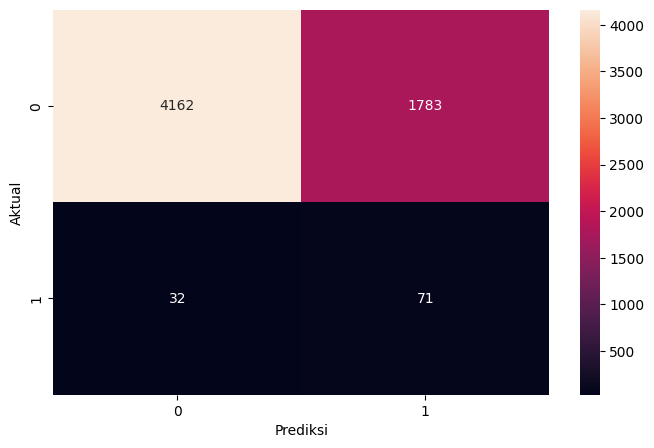

In [ ]:
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred4), annot=True, fmt='.0f', ax=ax)
plt.xlabel('Prediksi')
plt.ylabel('Aktual');

Berdasarkan Tuning yang telah dilakukan dapat ditarik kesimpulan sebagai berikut :
1. Tuning dengan menggunakan model XGB - RUS memberikan hasil best score = 0.7451, best param = {'model__learning_rate': 0.001, 'model__max_depth': 7, 'model__subsample': 0.7}, test set = 0.699
2. Tuning dengan menggunakan model GBS - RUS memberikan hasil best score = 0.8365, best param = {'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__min_samples_leaf': 0.5, 'model__n_estimators': 50}, & test set = 1
3. Tuning dengan menggunakan model LGB - RUS memberikan hasil best score = 0.7355, best param = {'model__learning_rate': 0.05, 'model__n_estimators': 50, 'model__num_leaves': 31}, & test set = 0,7282
4. Tuning dengan menggunakan model Logreg - ROS memberikan hasil best score = 0.6916, best param = {'model__C': 0.001,'model__max_iter': 1000,'model__penalty': 'l1','model__solver': 'liblinear','model__tol': 0.0001}, & test set = 0,6893
5. Parameter XGB - RUS disebut overfitting karena memprediksi recall secara akurat namun tidak dapat mengkategorikan orang yang tidak tergolong melakukan claim apakah kedepan akan berpotensi mengajukan claim asuransi atau tidak 
6. Matriks recall digunakan karena ingin memprediski orang yang memeang benar akan melakukan claim asuransi untuk perjalanan yang mereka lakukan 

Dengan memperhatikan matriks recall,precision dan f1 kita dapat menarik kesimpulan sebagai berikut :
-  dengan menggunakan model Default didapatkan hasil    nilai TP : 64,  TN : 39, FP : 1979, FN : 3966
1. Tuning dengan menggunakan model XGB - RUS menyatakan nilai TP : 72,  TN : 31, FP : 1860, FN : 4085
2. Tuning dengan menggunakan model GBS - RUS menyatakan nilai TP : 103, TN : 0,  FP : 5945, FN : 0
3. Tuning dengan menggunakan model LGB - RUS menyatakan nilai TP : 75,  TN : 28, FP : 4118, FN : 1827
4. Tuning dengan menggunakan model Log - ROS menyatakan nilai TP : 71,  TN : 32, FP : 4162, FN : 1783
    Meskipun Precision recall model GBS dapat memprediksikan model dengan Akurat namun tidak dapat mengklasifikasikan orang yang tidak mengajukan claim dengan baik, sehingga model tuning terbaik yang dapat diambil adalah LGB

### 5. Feature Importance

In [ ]:
koef = pd.DataFrame(model1.named_steps['model'].feature_importances_.reshape(-1,1))
koef['urutan'] = abs(koef[0])

koef['column']=model1.named_steps['preprocess'].get_feature_names_out()
koef = koef.sort_values(by='urutan', ascending=False)

<Axes: xlabel='0', ylabel='column'>

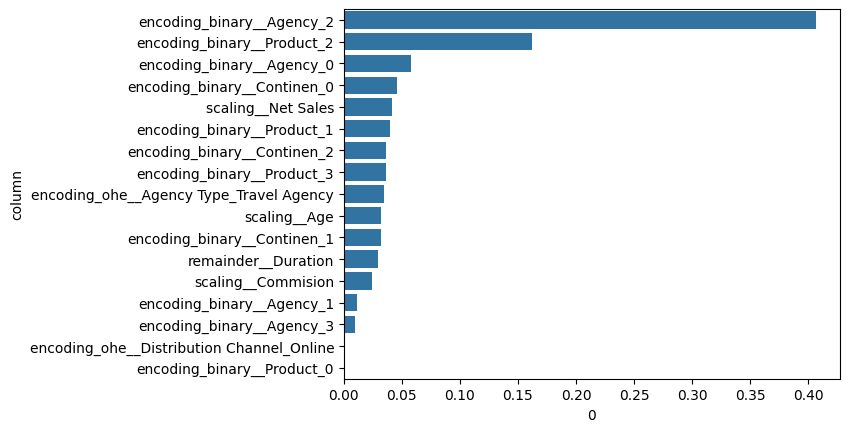

In [ ]:
sns.barplot(koef, x=0, y='column')

In [ ]:
X_train_trans = pd.DataFrame(
    model1.named_steps['preprocess']
    .transform(X_train), columns=model1
    .named_steps['preprocess']
    .get_feature_names_out()
)

In [ ]:
X_test_trans = pd.DataFrame(
    model1.named_steps['preprocess']
    .transform(X_test), columns=model1
    .named_steps['preprocess']
    .get_feature_names_out()
)

In [ ]:
import lime
from lime import lime_tabular

score = model1.named_steps['model'].score(X_test_trans, y_test)

In [ ]:
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_test_trans),
    feature_names=X_test_trans.columns,
    class_names=['Not Claim', 'Claim'],
    mode='classification'
)

In [ ]:
classifier = model1.named_steps['model']

In [ ]:
y_proba = model1.predict_proba(X_test)

In [ ]:
y_proba = pd.Series(y_proba[:,1]).reset_index().sort_values(by=0, ascending=False)
y_proba.head()

,index,0
4267,4267,0.999688
65,65,0.999373
2454,2454,0.999126
4726,4726,0.999073
1,1,0.999038


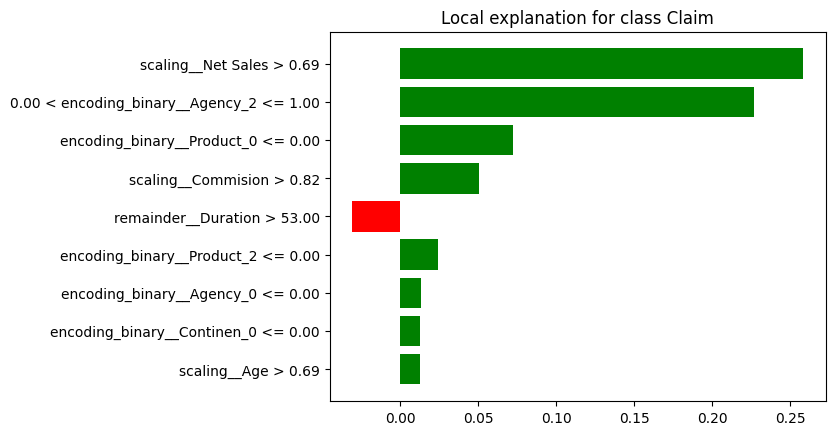

In [ ]:
exp = explainer.explain_instance(X_test_trans.iloc[4267],
                                 classifier.predict_proba,
                                 num_features=len(X_test.columns))

exp.as_pyplot_figure()
plt.show()

dengan menggunakan matriks berikut kita dapat mengetahui apa saja yang menentukan dalam pengambilan keputusan seseorang dalam mengajukan claim asuransi untuk perjalanan mereka 
1. Agency merupakan hal yang paling berpengaruh dalam seseorang akan mengambil claim asuransi dalam perjelanan mereka atau tidak karena agensi memiliki regulasi dan peraturan tersendiri 
2. Produk mempengaruhi dalam pengambilan keputusan untuk asuransi perjalanan karena produk memiliki privilage tersendiri bagi tiap pengguna 
3. Continen merupakan berpengaruh kepada customer dalam menentukan keputusan untuk mengambil asuransu dalam perjalanan mereka bila semakin jauh dari negara asal maka semakin besar peluang pengguna untuk mengajukan asuransi untuk perjalanan yang mereka lakukan 

## **Cost Evaluation**
Berdasarkan asumsi yang telah disampaikan pada bagian Business Understanding, kita asumsikan dampak biayanya sebagai berikut :
- Biaya Net sales berdasarkan 5 % dari total kesuluruhan harga perjalanan per klaim dari satu calon penumpang
- Biaya total kesuluruhan disini harga $ 3000

Saat kita tidak menggunakan machine learning, kita tidak dapat memprediksi jumlah penumpang yang tidak klaim. Dampaknya adalah kita cenderung untuk memberi program retensi kepada seluruh pengguna asuransi perjalanan.

Cost Estimation sebelum menggunakan machine learning

Jumlah calon penumpang untuk dasar perhitungan :
- calon penumpang yang diberikan program retensi = 495 orang
- calon penumpang yang aktualnya klaim = 48 orang

- 495 orang x 300 dollar sekali perjalanan + 48 orang x  300 dollar sekali perjalanan = ($ 148.500 + $ 14.400)sekali perjalanan = $ 162.990 sekali perjalanan

Maka kerugiannya sekitar **$ 162.990 per perjalanan** bila kita tidak menggunakan machine learning.

---

Saat kita menggunakan machine learning, kita hanya menawarkan program retensi ke calon penumpang yang diprediksi tidak klaim.

---


Cost Estimation sesudah menggunakan machine learning

Jumlah calon penumpang untuk dasar perhitungan :
- calon penumpang yang kita berikan program retensi = TP + FN = 36 + 12 = 48 orang
- calon penumpang yang aktualnya Claim = 48 orang


- 48 orang x 300 dollar sekali perjalanan + 48 orang x 300 dollat sekali perjalanan = (14.400 +  14.400) dollar sekali perjalanan = $ 28.800 sekali perjalanan

Penurunan mengurangi kerugian = 148.500 dollar -  28.800 dollar = 119.700 dollar sekali perjalanan

**% Penurunan** =  119.700 dollar /  148.500 dollar  x 100 = **80.6%**

Berdasarkan test set, model kita dapat menurunkan kerugian akibat tidak klaim hingga **80.6%** sekali perjalanan.
### Kesimpulan
Data preprocessing digunakan untuk menghapus kolom yang tidak diperlukan dan menyesuaikan data agar sesuai dengan business case yang ada
Pengelompokan data diperlukan agar machine learning dapat bekerja dengan lebih baik 
Parameter Overfitting terdapat pada GBS – RUS  

### Rekomendasi 
Diperlukan antisipasi untuk membuat harga total agar tidak mempengaruhi komisi yang diberikan dimana dari 6000 pelanggan hanya sekitar 150 orang yang akan mengajukan claim – 2.5% orang dari keseluruhan 
